In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
%aimport easysnowdata
import geopandas as gpd
import rioxarray as rxr
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm

## Harmonized Landsat-Sentinel (HLS)

We will use `easysnowdata` to access the HLS data for a single reservoir in the following section.

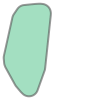

In [25]:
import geopandas as gpd
from pathlib import Path

# read the bounding box of the study area
val_pts = gpd.read_file(Path('../data/validation-locations/subset-validation-reservoirs-grand-pts.geojson'))
val_polys = gpd.read_file(Path('../data/validation-locations/subset-validation-reservoirs-grand.geojson'))

dumboor_pt = val_pts.loc[val_pts['tmsos_id']=='0810']
dumboor_poly = val_polys.loc[val_polys['tmsos_id']=='0810']

buffered_roi = dumboor_poly.geometry.iloc[0].convex_hull.buffer(0.05)
bbox = buffered_roi.bounds
buffered_roi

In [26]:
dumboor_poly.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [27]:
hls = easysnowdata.remote_sensing.HLS(
    bbox_input=buffered_roi, start_date="2022-01-01", end_date="2024-03-31"
)
hls

Data searched. Access the returned seach with the .search_landsat or .search_sentinel attribute.


{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'id': 'HLS.L30.T48PWB.2022002T031904.v2.0', 'stac_version': '1.0.0', 'stac_extensions': ['https://stac-extensions.github.io/eo/v1.0.0/schema.json'], 'collection': 'HLSL30.v2.0', 'geometry': {'type': 'Polygon', 'coordinates': [[[106.0182265, 14.3822116], [106.0228949, 15.3747904], [104.9998136, 15.3771396], [104.9998145, 14.3844026], [106.0182265, 14.3822116]]]}, 'bbox': [104.999814, 14.382212, 106.022895, 15.37714], 'links': [{'rel': 'self', 'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/HLSL30.v2.0/items/HLS.L30.T48PWB.2022002T031904.v2.0'}, {'rel': 'parent', 'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/HLSL30.v2.0'}, {'rel': 'collection', 'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/HLSL30.v2.0'}, {'rel': 'root', 'href': 'https://cmr.earthdata.nasa.gov/stac/'}, {'rel': 'provider', 'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD'}, {'rel': 'via', 'href': 'https

In [28]:
hls.data

<xarray.Dataset> Size: 51GB
Dimensions:                    (y: 1878, x: 933, time: 364)
Coordinates:
  * y                          (y) float64 15kB 1.687e+06 ... 1.631e+06
  * x                          (x) float64 7kB 5.275e+05 5.275e+05 ... 5.555e+05
    spatial_ref                int32 4B 32648
  * time                       (time) datetime64[ns] 3kB 2022-01-02T03:19:04....
    platform                   (time) <U11 16kB 'Landsat-8' ... 'Sentinel-2B'
    eo:cloud_cover_avg         (time) int64 3kB 0 0 74 2 0 0 ... 56 31 56 62 50
    AssociatedBrowseImageUrls  (time) object 3kB ['https://data.lpdaac.earthd...
    geometry                   (time) object 3kB MULTIPOLYGON (((106.0182265 ...
Data variables: (12/20)
    coastal aerosol            (time, y, x) float32 3GB dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
    blue                       (time, y, x) float32 3GB dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
    green                      (time, y, x) float32 3GB dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
    red                        (time, y, x) float32 3GB dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
    nir narrow                 (time, y, x) float32 3GB dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
    swir 1                     (time, y, x) float32 3GB dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
    ...                         ...
    VAA                        (time, y, x) float32 3GB dask.array<chunksize=(1, 512, 512), meta=np.ndarray>
    red-edge 1                 (time, y, x) float32 3GB dask.array<chunksize=(2, 512, 512), meta=np.ndarray>
    red-edge 2                 (time, y, x) float32 3GB dask.array<chunksize=(2, 512, 512), meta=np.ndarray>
    red-edge 3                 (time, y, x) float32 3GB dask.array<chunksize=(2, 512, 512), meta=np.ndarray>
    nir broad                  (time, y, x) float32 3GB dask.array<chunksize=(2, 512, 512), meta=np.ndarray>
    water vapor                (time, y, x) float32 3GB dask.array<chunksize=(2, 512, 512), meta=np.ndarray>

In [29]:
hls.mask_data()

Data masked. Using Fmask, removed pixels classified as:
Cirrus
Cloud
Adjacent to cloud / shadow
Cloud shadows


In [30]:
hls.get_rgb()
hls.rgb

RGB data retrieved. Access with the .rgb attribute.


<xarray.DataArray (band: 3, time: 364, y: 1878, x: 933)> Size: 8GB
dask.array<stack, shape=(3, 364, 1878, 933), dtype=float32, chunksize=(1, 1, 255, 255), chunktype=numpy.ndarray>
Coordinates:
  * y                          (y) float64 15kB 1.687e+06 ... 1.631e+06
  * x                          (x) float64 7kB 5.275e+05 5.275e+05 ... 5.555e+05
    spatial_ref                int32 4B 32648
  * time                       (time) datetime64[ns] 3kB 2022-01-02T03:19:04....
    platform                   (time) <U11 16kB 'Landsat-8' ... 'Sentinel-2B'
    eo:cloud_cover_avg         (time) int64 3kB 0 0 74 2 0 0 ... 56 31 56 62 50
    AssociatedBrowseImageUrls  (time) object 3kB ['https://data.lpdaac.earthd...
    geometry                   (time) object 3kB MULTIPOLYGON (((106.0182265 ...
  * band                       (band) object 24B 'red' 'green' 'blue'

In [31]:
f = hls.rgb.plot.imshow(col='time',col_wrap=6,robust=True)

for ax, time, platform in zip(f.axes.flat, hls.rgb.time.values, hls.rgb.platform.values):
    local_time = pd.to_datetime(time).tz_localize('UTC').tz_convert('America/Los_Angeles')
    ax.set_title(f'{local_time.strftime("%B %d, %Y")}\n{local_time.strftime("%I:%M%p")}\n{platform}')
    ax.axis('off')
    ax.set_aspect('equal')

f.fig.subplots_adjust(hspace=0.3)
f.fig.suptitle('Harmonized Landsat Sentinel-2 (HLS) time series',fontsize=16,y=1.04)

AssertionError: 

In [ ]:
hls.get_ndwi()
hls.ndwi

NDWI data calculated. Access with the .ndwi attribute.


<xarray.DataArray (time: 14, y: 779, x: 650)> Size: 28MB
dask.array<truediv, shape=(14, 779, 650), dtype=float32, chunksize=(1, 512, 512), chunktype=numpy.ndarray>
Coordinates:
  * y                          (y) float64 6kB 2.61e+06 2.61e+06 ... 2.587e+06
  * x                          (x) float64 5kB 3.732e+05 3.732e+05 ... 3.926e+05
    spatial_ref                int32 4B 32646
  * time                       (time) datetime64[ns] 112B 2022-07-02T04:32:12...
    platform                   (time) <U11 616B 'Sentinel-2A' ... 'Sentinel-2B'
    eo:cloud_cover_avg         (time) int64 112B 60 84 90 76 36 ... 97 63 49 92
    AssociatedBrowseImageUrls  (time) object 112B ['https://data.lpdaac.earth...
    geometry                   (time) object 112B MULTIPOLYGON (((91.7501206 ...

/tiger1/pdas47/tmsosPP/.env/lib/python3.11/site-packages/distributed/client.py:3161: UserWarning: Sending large graph of size 54.20 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
Ignoring read failure while reading: https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T46QCM.2022183T041601.v2.0/HLS.S30.T46QCM.2022183T041601.v2.0.Fmask.tif:1
/tiger1/pdas47/tmsosPP/.env/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/tiger1/pdas47/tmsosPP/.env/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
Ignoring read failure while reading: https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/HLSS30.020/HLS.S30.T46QCL.2022183T041601.v2.0/HLS.S30.T46QCL.2022183T041601.v2.0.Fmask.tif:1
Ignori

KeyboardInterrupt: 

<Figure size 1000x1000 with 0 Axes>

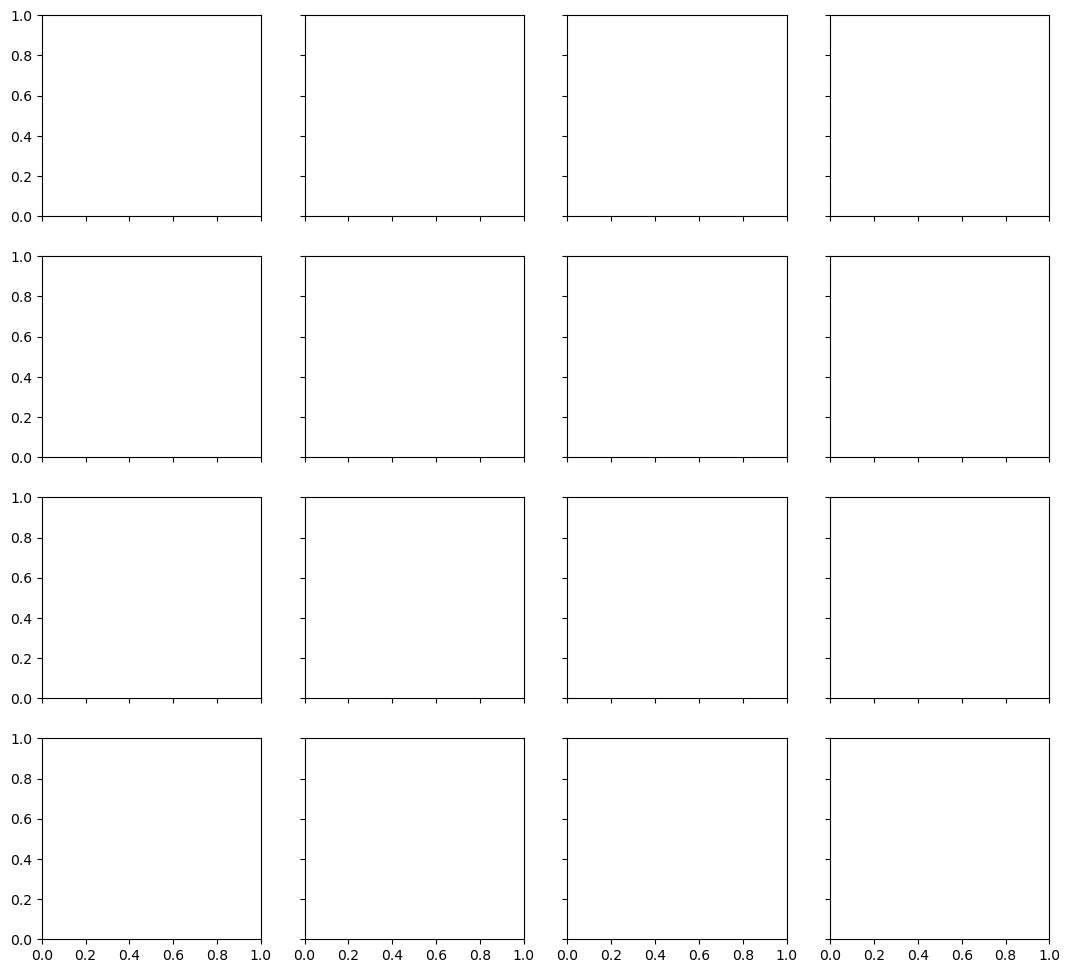

In [ ]:
fig = plt.figure(figsize=(10, 10))

f = hls.ndwi.plot.imshow(col='time',col_wrap=4,robust=True, cmap='RdYlBu', vmax=0.3)

for ax, time, platform in zip(f.axes.flat, hls.ndwi.time.values, hls.ndwi.platform.values):
    local_time = pd.to_datetime(time).tz_localize('UTC').tz_convert('Asia/Kolkata')
    ax.set_title(f'{local_time.strftime("%B %d, %Y")}\n{local_time.strftime("%I:%M%p")}\n{platform}')
    ax.axis('off')
    ax.set_aspect('equal')

f.fig.subplots_adjust(hspace=0.3)
f.fig.suptitle('Harmonized Landsat Sentinel-2 (HLS) time series',fontsize=16,y=1.04)

## Download HLS data for 10 reservoirs

Now that we have a way of accessing HLS data, let's download the data locally so that we can use it in our further analysis.

In [ ]:
from pathlib import Path

hls_save_dir = Path('../data/hls')
hls_save_dir.mkdir(exist_ok=True)

Select a few reservoirs, say 10 reservoirs and download their data.

The data will be saved as follows:
```
data/
..hls/
....<res 1 tmsos_id>/
......year 1/
......year 2/
....<res 2 tmsos_id>/
......year 1/
......year 2/
....<res 3 tmsos_id>/
......year 1/
......year 2/
:
```

<Axes: >

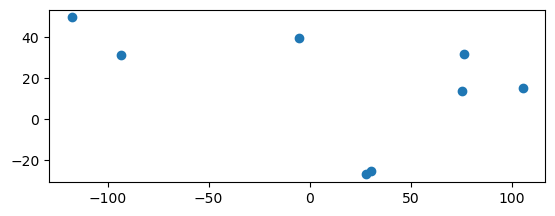

In [ ]:
import geopandas as gpd
from pathlib import Path

# read the bounding box of the study area
val_pts = gpd.read_file(Path('../data/validation-locations/subset-validation-reservoirs-grand-pts.geojson'))
val_polys = gpd.read_file(Path('../data/validation-locations/subset-validation-reservoirs-grand.geojson'))

selected_reservoirs = [
    # '0505', # dumboor. India
    '0810', # sirindhorn, Thailand.
    # '0830', # Krasoew, Thailand.
    '0502', # Bhakra dam, India.
    '0518', # Bhadra, India.
    '0349', # vaaldam, South Africa.
    '0464', # Sterkspruit, South Africa.
    '0214', # Cijara, Spain
    '1498', # Toledo bend, US
    '0936', # Arrow, Canada
]

val_res_pt = val_pts.loc[val_pts['tmsos_id'].isin(selected_reservoirs)]
val_res_poly = val_polys.loc[val_polys['tmsos_id'].isin(selected_reservoirs)]

val_res_pt.plot()

In [ ]:
import dask
from dask.distributed import Client

In [ ]:
client = Client(
    n_workers=10, threads_per_worker=1
)
client

/tiger1/pdas47/tmsosPP/.env/lib/python3.12/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 34347 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:34347/status,
Dashboard: http://127.0.0.1:34347/status,Workers: 10
Total threads: 10,Total memory: 187.55 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:34425,Workers: 10
Dashboard: http://127.0.0.1:34347/status,Total threads: 10
Started: Just now,Total memory: 187.55 GiB
Comm: tcp://127.0.0.1:36409,Total threads: 1
Dashboard: http://127.0.0.1:40407/status,Memory: 18.76 GiB
Nanny: tcp://127.0.0.1:36471,


In [ ]:
import easysnowdata
import xarray as xr

def get_hls_id(
        id, 
        start_date="2022-07-01", 
        end_date="2022-07-31", 
        buffer=0.05
    ):
    roi = val_res_poly.loc[val_res_poly['tmsos_id']==id]
    buffered_roi = roi.geometry.iloc[0].convex_hull.buffer(buffer)
    hls = easysnowdata.remote_sensing.HLS(
        bbox_input=buffered_roi, start_date=start_date, end_date=end_date,
        bands=[
            'blue', 'green', 'red', 'nir narrow', 'swir 1', 'swir 2', 'Fmask'
        ]
    )
    hls.mask_data()

    raw_bands = hls.data
    hls.get_ndwi()
    ndwi = hls.ndwi.to_dataset(name='ndwi')

    data = xr.merge([raw_bands, ndwi])

    data = data.assign_coords(
        reservoir=((id))
    )

    data = data.chunk(chunks={
        'time': 30,
        'x': 1024,
        'y': 1024
    })
    
    # data['geometry'] = data['geometry'].astype(str)
    # data['AssociatedBrowseImageUrls'] = data['AssociatedBrowseImageUrls'].astype(str)

    return data

# ### serially download and save the data (skip to save time)
# dsses = []
# for id in selected_reservoirs:
#     ds = client.submit(get_hls_id, id=id, start_date='2021-01-01', end_date='2024-02-28')
#     dsses.append(ds)

# dsses = client.gather(dsses)

# ## save (skip to save time)
# remote_dsses = dsses.copy()
# for ds in tqdm(dsses):
#     reservoir_id = ds.reservoir.values
#     savefp = hls_save_dir / f'{reservoir_id}.zarr'

#     # temporarily remove geometry and AssociatedBrowseImageUrls
#     ds = ds.drop_vars(['geometry', 'AssociatedBrowseImageUrls'])

#     ds.to_zarr(savefp, mode='w', consolidated=True)

In [ ]:
import tqdm.notebook as tqmd
import xarray as xr

def download_hls_resrvoirs(
        reservoir_ids,
        start_date = "2019-12-01", end_date="2020-03-05",
        buffer_amt = 0.05,
        save_dir = Path('data/')
    ):
    save_dir = Path(save_dir)
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    for reservoir_id in tqdm(reservoir_ids):
        save_fp = save_dir / f"{reservoir_id}.zarr"
        if save_fp.exists():
            existing_ds = xr.open_zarr(save_fp)
            existing_start_date = pd.to_datetime(existing_ds.time.isel(time=0).values).date()
            existing_end_date = pd.to_datetime(existing_ds.time.isel(time=-1).values).date()

            sought_time_period = pd.date_range(start_date, end_date)
            existing_time_period = pd.date_range(existing_start_date, existing_end_date)
            idx_data_required = ~sought_time_period.isin(existing_time_period)
            data_required = pd.Series(sought_time_period[idx_data_required])
            breaks = data_required[(data_required.diff(1) > pd.Timedelta(1, 'days')) | ((data_required.diff(-1) > pd.Timedelta(1, 'days')))]
            breaks_idx = pd.Index([0]).append(breaks.index)
            idx_ranges = []
            for i, idx in enumerate(breaks_idx[1:]):
                start_idx = breaks_idx[i] if i == 0 else breaks_idx[i] + 1
                idx_ranges.append([start_idx, idx])
            if breaks_idx[-1] != len(data_required)-1:
                idx_ranges.append([breaks_idx[-1], len(data_required)-1])
        else:
            data_required = pd.date_range(start_date, end_date)
            idx_ranges = [[0, len(data_required)]]

        for start_idx, end_idx in tqmd.tqdm(idx_ranges):
            print(start_idx, end_idx, data_required)
            start_date = data_required[start_idx]# .tz_localize('UTC').tz_convert('UTC')
            end_date = data_required[end_idx]# .tz_localize('UTC').tz_convert('UTC')
            if start_date.tz is None:
                start_date = start_date.tz_localize('UTC')
            if end_date.tz is None:
                end_date = end_date.tz_localize('UTC')

            start_date = start_date.tz_convert('UTC')
            end_date = end_date.tz_convert('UTC')
            print(start_date, end_date)
            ds = get_hls_id(
                reservoir_id, start_date, end_date, buffer_amt
            )
            ds = ds.drop_vars(['geometry', 'AssociatedBrowseImageUrls'])

            ds.to_zarr(save_fp, mode='w', consolidated=True)

download_hls_resrvoirs(selected_reservoirs, save_dir=Path('../data/hls/'))

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

0 1 0   2019-12-01
1   2020-03-05
dtype: datetime64[ns]
2019-12-01 00:00:00+00:00 2020-03-05 00:00:00+00:00


Data searched. Access the returned seach with the .search_landsat or .search_sentinel attribute.
{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'id': 'HLS.L30.T48PWB.2019346T031908.v2.0', 'stac_version': '1.0.0', 'stac_extensions': ['https://stac-extensions.github.io/eo/v1.0.0/schema.json'], 'collection': 'HLSL30.v2.0', 'geometry': {'type': 'Polygon', 'coordinates': [[[106.0182265, 14.3822116], [106.0228949, 15.3747904], [104.9998136, 15.3771396], [104.9998145, 14.3844026], [106.0182265, 14.3822116]]]}, 'bbox': [104.999814, 14.382212, 106.022895, 15.37714], 'links': [{'rel': 'self', 'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/HLSL30.v2.0/items/HLS.L30.T48PWB.2019346T031908.v2.0'}, {'rel': 'parent', 'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/HLSL30.v2.0'}, {'rel': 'collection', 'href': 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/collections/HLSL30.v2.0'}, {'rel': 'root', 'href': 'https://cmr.earthdata.nasa.gov/stac/'}, {'rel': 

  0%|          | 0/1 [00:00<?, ?it/s]

0 95 0    2019-12-01 00:00:00+00:00
1    2019-12-02 00:00:00+00:00
2    2019-12-03 00:00:00+00:00
3    2019-12-04 00:00:00+00:00
4    2019-12-05 00:00:00+00:00
                ...           
91   2020-03-01 00:00:00+00:00
92   2020-03-02 00:00:00+00:00
93   2020-03-03 00:00:00+00:00
94   2020-03-04 00:00:00+00:00
95   2020-03-05 00:00:00+00:00
Length: 96, dtype: datetime64[ns, UTC]
2019-12-01 00:00:00+00:00 2020-03-05 00:00:00+00:00
Data searched. Access the returned seach with the .search_landsat or .search_sentinel attribute.
{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'id': 'HLS.L30.T43SFR.2019340T053019.v2.0', 'stac_version': '1.0.0', 'stac_extensions': ['https://stac-extensions.github.io/eo/v1.0.0/schema.json'], 'collection': 'HLSL30.v2.0', 'geometry': {'type': 'Polygon', 'coordinates': [[[76.5362648, 31.5375383], [76.8076998, 32.5243622], [76.0648799, 32.5328466], [76.053476, 31.5424273], [76.5362648, 31.5375383]]]}, 'bbox': [76.053476, 31.537538, 76.8077, 32.5

  0%|          | 0/1 [00:00<?, ?it/s]

0 95 0    2019-12-01 00:00:00+00:00
1    2019-12-02 00:00:00+00:00
2    2019-12-03 00:00:00+00:00
3    2019-12-04 00:00:00+00:00
4    2019-12-05 00:00:00+00:00
                ...           
91   2020-03-01 00:00:00+00:00
92   2020-03-02 00:00:00+00:00
93   2020-03-03 00:00:00+00:00
94   2020-03-04 00:00:00+00:00
95   2020-03-05 00:00:00+00:00
Length: 96, dtype: datetime64[ns, UTC]
2019-12-01 00:00:00+00:00 2020-03-05 00:00:00+00:00
Data searched. Access the returned seach with the .search_landsat or .search_sentinel attribute.
{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'id': 'HLS.L30.T43PEQ.2019335T051722.v2.0', 'stac_version': '1.0.0', 'stac_extensions': ['https://stac-extensions.github.io/eo/v1.0.0/schema.json'], 'collection': 'HLSL30.v2.0', 'geometry': {'type': 'Polygon', 'coordinates': [[[76.0105993, 12.5736606], [76.0146471, 13.5663894], [74.9998151, 13.5684513], [74.9998159, 12.5755667], [76.0105993, 12.5736606]]]}, 'bbox': [74.999815, 12.573661, 76.014647, 1

Read locally.

In [10]:
# load
dsses = []
for reservoir_id in selected_reservoirs:
    savefp = hls_save_dir / f'{reservoir_id}.zarr'
    ds = xr.open_zarr(savefp)

    # x = [(float(ds.reservoir.values), x) for x in ds.x.values]
    # y = [(float(ds.reservoir.values), y) for y in ds.y.values]

    

    # ds = ds.assign_coords(
    #     x=(("reservoir", "x"), x),
    #     y=(("y"), y)
    # )
    # ds = ds.stack(res_x=('reservoir', 'x'), res_y=('reservoir', 'y'))
    # ds = ds.assign_coords(
        # reservoir=((reservoir_id)),
        # x = ("reservoir_id", ds.x.values),
        # y = (reservoir_id, ds.y.values)
    # )

    dsses.append(ds)
dsses

[<xarray.Dataset> Size: 4GB
 Dimensions:             (time: 277, y: 779, x: 650)
 Coordinates:
     eo:cloud_cover_avg  (time) int64 2kB dask.array<chunksize=(30,), meta=np.ndarray>
     platform            (time) <U11 12kB dask.array<chunksize=(30,), meta=np.ndarray>
     reservoir           <U4 16B ...
     spatial_ref         int32 4B ...
   * time                (time) datetime64[ns] 2kB 2019-01-02T04:41:48.360000 ...
   * x                   (x) float64 5kB 3.732e+05 3.732e+05 ... 3.926e+05
   * y                   (y) float64 6kB 2.61e+06 2.61e+06 ... 2.587e+06
 Data variables:
     Fmask               (time, y, x) float32 561MB dask.array<chunksize=(30, 779, 650), meta=np.ndarray>
     blue                (time, y, x) float32 561MB dask.array<chunksize=(30, 779, 650), meta=np.ndarray>
     green               (time, y, x) float32 561MB dask.array<chunksize=(30, 779, 650), meta=np.ndarray>
     ndwi                (time, y, x) float32 561MB dask.array<chunksize=(30, 779, 650), me

first index

In [2]:
df = dsses[0].to_dataframe()
df.head()

In [3]:
ds_reswise = df.reset_index().set_index(['reservoir', 'time', 'x', 'y']).to_xarray()
ds_reswise

second index

In [10]:
# df = dsses[1]
# df.head()

# ds_reswise_2 = df.reset_index().set_index(['reservoir', 'time', 'x', 'y']).to_xarray()
# ds_reswise_2

In [1]:
ds = xr.concat([ds_reswise, dsses[1]], dim='reservoir')
ds

NameError: name 'xr' is not defined

In [11]:
# dfs = []
# for i in range(len(dsses)):
#     df = dsses[i][['reservoir', 'x', 'y', 'ndwi']].to_dataframe().reset_index()
#     dfs.append(df.set_index(['reservoir', 'x', 'y']))#.to_xarray()
# dfs

df = dsses[0][['reservoir', 'x', 'y', 'ndwi']].to_dask_dataframe()
df

/tiger1/pdas47/tmsosPP/.env/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3488: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explicitly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  if await self.run_code(code, result, async_=asy):
/tiger1/pdas47/tmsosPP/.env/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3488: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To a

,x,y,time,reservoir,eo:cloud_cover_avg,platform,spatial_ref,ndwi
npartitions=10,,,,,,,,
0,float64,float64,datetime64[ns],string,int64,string,int32,float32
14025895,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...
126233055,...,...,...,...,...,...,...,...
140258949,...,...,...,...,...,...,...,...


In [17]:
# dsses[0].assign_coords(
#     x=(["reservoir", "x"], ),
#     y=(["reservoir", "y"], ),
# )
dfs = []
for i in range(len(dsses)):
    df = dsses[i][['reservoir', 'x', 'y', 'ndwi']].to_dataframe().reset_index()
    dfs.append(df.set_index(['reservoir', 'x', 'y']))#.to_xarray()
merged_df = pd.concat(dfs).to_xarray()
merged_df

KeyboardInterrupt: 

In [49]:
dsses = client.gather(futures)
dsses

KeyboardInterrupt: 

In [11]:
def sizeof_fmt(num, suffix="B"):
    for unit in ("", "Ki", "Mi", "Gi", "Ti", "Pi", "Ei", "Zi"):
        if abs(num) < 1024.0:
            return f"{num:3.1f}{unit}{suffix}"
        num /= 1024.0
    return f"{num:.1f}Yi{suffix}"

total_size = 0
for ds in dsses:
    s = ds.nbytes
    total_size += s
    print(sizeof_fmt(s))
print(f'Total size: {sizeof_fmt(total_size)}')

4.2GiB
17.4GiB
Total size: 21.6GiB


For a month of HLS data for 10 reservoirs, the total size of dataset comes to around 17 GiB.

In [ ]:
dsses[0].drop_vars(['geometry', 'AssociatedBrowseImageUrls'])

<xarray.Dataset> Size: 389MB
Dimensions:             (time: 24, y: 779, x: 650)
Coordinates:
  * y                   (y) float64 6kB 2.61e+06 2.61e+06 ... 2.587e+06
  * x                   (x) float64 5kB 3.732e+05 3.732e+05 ... 3.926e+05
    spatial_ref         int32 4B 32646
  * time                (time) datetime64[ns] 192B 2020-01-02T04:42:03.396000...
    platform            (time) <U11 1kB dask.array<chunksize=(24,), meta=np.ndarray>
    eo:cloud_cover_avg  (time) int64 192B dask.array<chunksize=(24,), meta=np.ndarray>
    reservoir           <U4 16B '0505'
Data variables:
    blue                (time, y, x) float32 49MB dask.array<chunksize=(24, 779, 650), meta=np.ndarray>
    green               (time, y, x) float32 49MB dask.array<chunksize=(24, 779, 650), meta=np.ndarray>
    red                 (time, y, x) float32 49MB dask.array<chunksize=(24, 779, 650), meta=np.ndarray>
    nir narrow          (time, y, x) float32 49MB dask.array<chunksize=(24, 779, 650), meta=np.ndarray>
    swir 1              (time, y, x) float32 49MB dask.array<chunksize=(24, 779, 650), meta=np.ndarray>
    swir 2              (time, y, x) float32 49MB dask.array<chunksize=(24, 779, 650), meta=np.ndarray>
    Fmask               (time, y, x) float32 49MB dask.array<chunksize=(24, 779, 650), meta=np.ndarray>
    ndwi                (time, y, x) float32 49MB dask.array<chunksize=(24, 779, 650), meta=np.ndarray>

In [ ]:
for ds in dsses:
    reservoir_id = ds.reservoir.values
    savefp = hls_save_dir / f'{reservoir_id}.zarr'

    # temporarily remove geometry and AssociatedBrowseImageUrls
    ds = ds.drop_vars(['geometry', 'AssociatedBrowseImageUrls'])

    ds.to_zarr(savefp, mode='a', consolidated=True)

/tiger1/pdas47/tmsosPP/.env/lib/python3.11/site-packages/distributed/client.py:3161: UserWarning: Sending large graph of size 93.04 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
/tiger1/pdas47/tmsosPP/.env/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/tiger1/pdas47/tmsosPP/.env/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/tiger1/pdas47/tmsosPP/.env/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/tiger1/pdas47/tmsosPP/.env/lib/python3.11/site-packages/distributed/client.py:3161: UserWarning: Sending large graph of size 295.30 MiB.
This may cause some slowdown.
Consider scattering data ahead of time

Saved 12 GB data in 35 mins.